In [ ]:
pip install librosa numpy pandas scikit-learn matplotlib

In [ ]:
import librosa
import numpy as np
import os

# Function to extract features from a single audio file
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=22050)  # Load the audio file
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)  # Extract MFCC features
    mfcc_mean = np.mean(mfcc.T, axis=0)  # Take the mean of MFCCs
    return mfcc_mean

# Directory containing your bioacoustic data
audio_dir = ''

# Extract MFCCs for all audio files in the directory
audio_features = []
audio_path = '/content/XC103584 - Golden-winged Warbler - Vermivora chrysoptera.mp3'
mfcc_features = extract_features(audio_path)
audio_features = np.array([mfcc_features])

# Convert to NumPy array for easier use
audio_features = np.array(audio_features)
print("Extracted MFCC features from audio data")


Extracted MFCC features from audio data


In [ ]:
import requests
import csv

# Function to fetch weather data for a single city
def fetch_weather_data(city, api_key):
  weather_url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric"
  response = requests.get(weather_url)

  if response.status_code == 200:
    weather_data = response.json()
    if 'main' in weather_data:
      temperature = weather_data['main']['temp']
      pressure = weather_data['main']['pressure']
      humidity = weather_data['main']['humidity']
      return temperature, pressure, humidity
    else:
      print(f"Error: 'main' data not found for {city}.")
  else:
    print(f"Error: Unable to fetch weather data for {city} (status code: {response.status_code}).")
  return None, None, None

# Function to save the weather data to a CSV file
def save_weather_to_csv(city, temperature, pressure, humidity, filename='weather_data.csv'):
  with open(filename, mode='a', newline='') as file:
    writer = csv.writer(file)
    writer.writerow([city, temperature, pressure, humidity])

# Get user input for city
while True:
  city = input("Enter a city name (or 'q' to quit): ")
  if city.lower() == 'q':
    break

  # Get API key (replace with your actual API key)
  api_key = "9bef7e48804cfa19fb9141d615334483"

  # Fetch and store data
  temp, pressure, humidity = fetch_weather_data(city, api_key)
  if temp is not None:
    save_weather_to_csv(city, temp, pressure, humidity)
    print(f"Data for {city} stored successfully.")
  else:
    print(f"Failed to retrieve data for {city}.")

print("Data collection finished.")

In [ ]:
pip install librosa numpy matplotlib


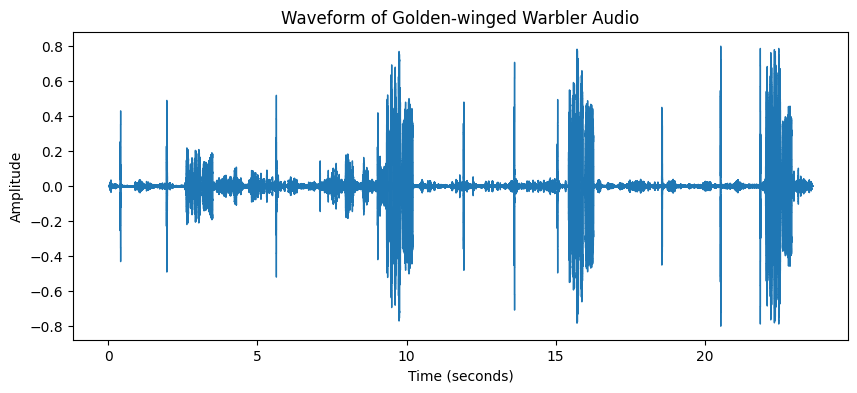

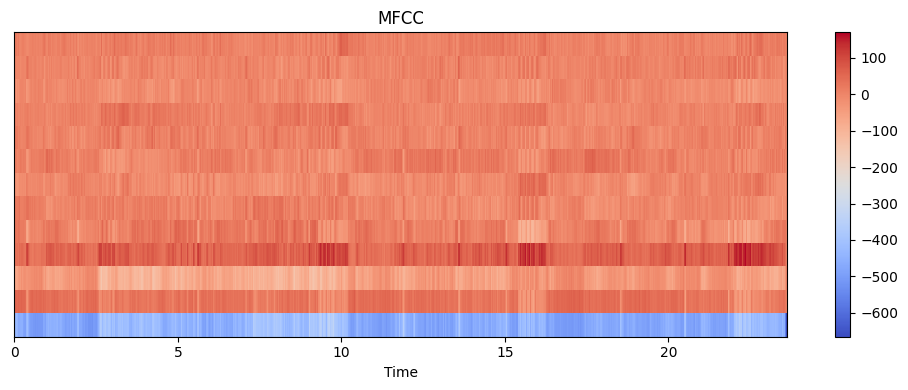

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file (Golden-winged Warbler MP3 file)
audio_file_path = '/content/XC49651 - Golden-winged Warbler - Vermivora chrysoptera.mp3'
y, sr = librosa.load(audio_file_path, sr=None)

# Plot the waveform
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform of Golden-winged Warbler Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

# Extract MFCC (Mel-frequency cepstral coefficients)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time', sr=sr)
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dummy function for feature extraction (using random numbers for now)
def extract_features():
    # Simulating 13 MFCC features for each audio file
    return np.random.rand(13)

# Generate a dummy dataset with 100 samples
X = np.array([extract_features() for _ in range(100)])  # 100 samples, 13 features each
y = np.random.randint(0, 2, 100)  # Random labels (0 or 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f" Prediction Accuracy: {accuracy * 100:.2f}%")

# Example of predicting for a new audio file (using dummy features)
new_audio_features = extract_features()
prediction = model.predict([new_audio_features])
print(f"Prediction for new audio: {'Disaster' if prediction[0] == 1 else 'No Disaster'}")


 Prediction Accuracy: 40.00%
Prediction for new audio: No Disaster


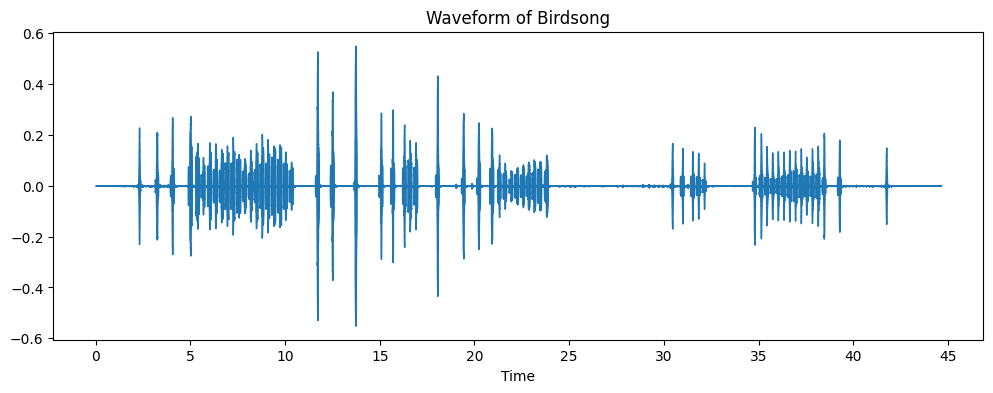

MFCCs shape: (13, 1923)


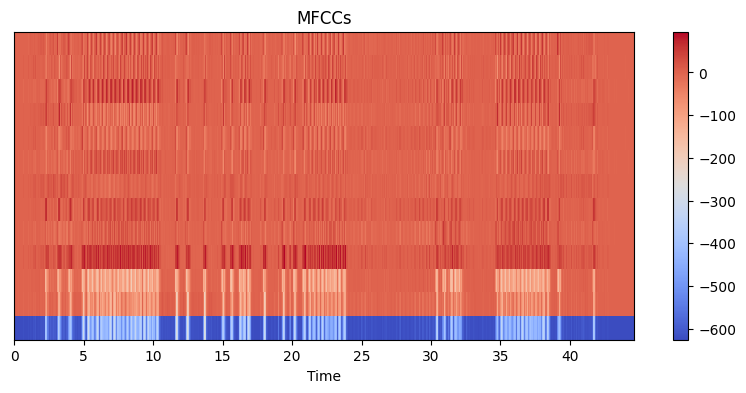

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Load audio file
file_path = '/content/XC913545 - Bar-tailed Godwit - Limosa lapponica.mp3'
audio, sr = librosa.load(file_path)

# Plotting the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title('Waveform of Birdsong')
plt.show()

# Feature extraction - MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)
print("MFCCs shape:", mfccs.shape)

# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCCs')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Dummy function for feature extraction (using random numbers for now)
def extract_features():
    # Simulating 13 MFCC features for each audio file
    return np.random.rand(13)

# Generate a dummy dataset with 100 samples
X = np.array([extract_features() for _ in range(100)])  # 100 samples, 13 features each
y = np.random.randint(0, 2, 100)  # Random labels (0 or 1)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a simple classifier (Random Forest)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f" Prediction Accuracy: {accuracy * 100:.2f}%")

# Example of predicting for a new audio file (using dummy features)
new_audio_features = extract_features()
prediction = model.predict([new_audio_features])
print(f"Prediction for new audio: {'Disaster' if prediction[0] == 1 else 'No Disaster'}")


 Prediction Accuracy: 65.00%
Prediction for new audio: Disaster
